1.DOWNLOAD THE DATA SET

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
!unzip '/content/drive/MyDrive/Flowers-Dataset.zip'

Archive:  /content/drive/MyDrive/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423

2.IMAGE AUGMENTATION

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

In [15]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [50]:
xtrain=train_datagen.flow_from_directory('/content/flowers',
                                         target_size=(76,76),
                                         class_mode='categorical',
                                         batch_size=100)

Found 4317 images belonging to 5 classes.


In [111]:
xtest=test_datagen.flow_from_directory('/content/flowers',
                                         target_size=(76,76),
                                         class_mode='categorical',
                                         batch_size=100)

Found 4317 images belonging to 5 classes.


3.CREAT MODEL

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Convolution2D,MaxPool2D,Flatten,Dense

4.ADD LAYERS 

In [21]:
model=Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(76,76,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(4,activation='softmax'))

5.COMPILE THE MODEL

In [62]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

6.FIT THE MODEL

In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [64]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [75]:
early_stop = EarlyStopping(monitor='val_accuracy',
                           patience=5)
lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, min_lr=0.00001)
callback = [early_stop,lr]

In [ ]:
model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=100,
                    callbacks=callback,
                    validation_data=xtest,
                    validation_steps=len (xtest))

7. SAVE THE MODEL

In [24]:
model.save('flowers.h5')

8.TESTING THE MODEL

testing 1

In [29]:
from tensorflow.keras.preprocessing import image
import numpy as np

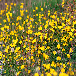

In [36]:
img=image.load_img('/content/flowers/dandelion/1080179756_5f05350a59.jpg',target_size=(76,76))
img

In [32]:
x=image.img_to_array(img)
x
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
pred
op=['daisy','dandelion','rose','sunflower','tulip']
op[pred]

'daisy'

testing 2

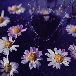

In [35]:
img=image.load_img('/content/flowers/daisy/10172567486_2748826a8b.jpg',target_size=(76,76))
img

In [ ]:
x=image.img_to_array(img)
x
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
pred
op=['daisy','dandelion','rose','sunflower','tulip']
op[pred]

'daisy'

testing 3

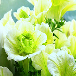

In [37]:
img=image.load_img('/content/flowers/dandelion/12093962485_7c3e9a2a23_n.jpg',target_size=(76,76))
img

In [38]:
x=image.img_to_array(img)
x
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
pred
op=['daisy','dandelion','rose','sunflower','tulip']
op[pred]

'daisy'